In [68]:
import numpy as np
import scipy.linalg as sp_la
from matplotlib import pyplot as plt
%matplotlib inline

import random as rnd
import os
import math

# required for interactive plotting
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import numpy.polynomial as np_poly

from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

from pprint import pprint
import functools as ft
from prettytable import PrettyTable

initialization
$
\newcommand{\E}[1]{\mathbb{E}\left[ #1 \right]}
\newcommand{\V}[1]{\mathbb{V}\left[#1\right]}
\newcommand{\H}[1]{\mathbb{H}\left[#1\right]}
\newcommand{\cov}[1]{\text{cov} \sigma\left[#1\right]}
\newcommand{\EXP}[1]{\exp\left\{#1\right\}} 
\newcommand{\LN}[1]{\ln\left\{#1\right\}} 
\newcommand{\P}{\mathbb{P}}
\newcommand{\underl}[1]{\text{$\underline{#1}$}}
\newcommand{\fracone}[1]{\frac{1}{#1}}
\newcommand{\half}{\fracone{2}}
\newcommand{\Lim}[1]{\displaystyle \lim_{#1}}
\newcommand{\Norm}[1]{\left\lVert #1 \right\rVert}
\newcommand{\inv}[1]{#1^{-1}}
\newcommand{\invp}[1]{\left({#1}\right)^{-1}}
\DeclareMathOperator*{\argmin}{arg\,min}
\DeclareMathOperator*{\argmax}{arg\,max}
\newcommand{\ml}[1]{#1_{\text{ML}}}
\newcommand{\Partial}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\KL}[2]{\text{KL}\left(#1 \Vert #2\right)}
\newcommand{\MI}[1]{\mathcal{I}\left(#1\right)}
\newcommand{\Ln}[1]{\ln \left\(#1\right\)}
\newcommand{\Lnb}[1]{\ln \left\{#1\right\} }
\newcommand{\Mod}[1]{\left|#1\right|}
\newcommand{\Bracket}[1]{\left[#1\right]}
\newcommand{\trace}[1]{\text{Tr}\left( #1 \right)}
$
$
\newcommand{\mat}[1]{ \left[ \begin{matrix} #1 \end{matrix} \right] }
\newcommand{\matp}[1]{ \left( \begin{matrix} #1 \end{matrix} \right)}
\newcommand{\mats}[1]{ \begin{matrix}#1\end{matrix} }
\newcommand{\arrthree}[1]{
\begin{array}{rlr} #1 \end{array}}
$
$
\newcommand{\C}{\mathbb{C}}
\newcommand{\Ca}{\mathcal{C}}
\newcommand{\D}{\mathcal{D}}
\newcommand{\G}{\mathcal{G}}
\newcommand{\I}{\mathcal{I}}
\newcommand{\L}{\mathcal{L}}
\newcommand{\N}{\mathbb{N}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\Ra}{\mathcal{R}}
$
$
\newcommand{\commentgray}[1]{\color{gray}{\text{#1}}}
\newcommand{\Ref}[1]{(\ref{#1})}
$

sum, product
$
\newcommand{\sumiD}{\displaystyle \sum_{i=1}^{D}}
\newcommand{\sumiN}{\displaystyle \sum_{i=1}^{N}}
\newcommand{\sumjD}{\displaystyle \sum_{j=1}^{D}}
\newcommand{\sumjK}{\displaystyle \sum_{j=1}^{K}}
\newcommand{\sumjMl}{\sum_{j=1}^{M-1}}
\newcommand{\sumkK}{\displaystyle \sum_{k=1}^{K}}
\newcommand{\sumkM}{\displaystyle \sum_{k=1}^{M}}
\newcommand{\sumkMl}{\sum_{k=1}^{M-1}}
\newcommand{\summN}{\displaystyle \sum_{m=1}^{N}}
\newcommand{\sumnN}{\displaystyle \sum_{n=1}^{N}}
$
$
\newcommand{\prodiD}{\displaystyle \prod_{i=1}^{D}}
\newcommand{\prodiN}{\displaystyle \prod_{i=1}^{N}}
\newcommand{\prodjK}{\displaystyle \prod_{j=1}^{K}}
\newcommand{\prodkK}{\displaystyle \prod_{k=1}^{K}}
\newcommand{\prodmN}{\displaystyle \prod_{m=1}^{N}}
\newcommand{\prodnN}{\displaystyle \prod_{n=1}^{N}}
$

alphabet shortcuts
$
\newcommand{\ab}{\mathbf{a}}
\newcommand{\Ab}{\mathbf{A}}
\newcommand{\At}{\Ab^T}
\newcommand{\Ai}{\inv{\Ab}}
\newcommand{\Abjk}{\Ab_{jk}}
\newcommand{\bb}{\mathbf{b}}
\newcommand{\bt}{\bb^T}
\newcommand{\Bb}{\mathbf{B}}
\newcommand{\Bt}{\Bb^T}
\newcommand{\Cb}{\mathbf{C}}
\newcommand{\Db}{\mathbf{D}}
\newcommand{\fb}{\mathbf{f}}
\newcommand{\fp}{f^{\prime}}
\newcommand{\Hb}{\mathbf{H}}
\newcommand{\Jb}{\mathbf{J}}
\newcommand{\Kb}{\mathbf{K}}
\newcommand{\Lb}{\mathbf{L}}
\newcommand{\Lt}{\Lb^T}
\newcommand{\Lbi}{\Lb^{-1}}
\newcommand{\mb}{\mathbf{m}}
\newcommand{\mt}{\mb^T}
\newcommand{\Mb}{\mathbf{M}}
\newcommand{\Qb}{\mathbf{Q}}
\newcommand{\Rb}{\mathbf{R}}
\newcommand{\Sb}{\mathbf{S}}
\newcommand{\tb}{\mathbf{t}}
\newcommand{\ub}{\mathbf{u}}
\newcommand{\Ub}{\mathbf{U}}
\newcommand{\Ut}{\Ub^T}
\newcommand{\vb}{\mathbf{v}}
\newcommand{\Vb}{\mathbf{V}}
\newcommand{\wb}{\mathbf{w}}
\newcommand{\wt}{\wb^T}
\newcommand{\Wb}{\mathbf{W}}
\newcommand{\Xb}{\mathbf{X}}
\newcommand{\Xt}{\Xb^T}
\newcommand{\xb}{\mathbf{x}}
\newcommand{\xt}{\xb^T}
\newcommand{\xp}{x^{\prime}}
\newcommand{\xbp}{\xb^{\prime}}
\newcommand{\xbm}{\xb_m}
\newcommand{\xbn}{\xb_n}
\newcommand{\xab}{\mathbf{x_a}}
\newcommand{\xabt}{\mathbf{x_a}^T}
\newcommand{\xbb}{\mathbf{x_b}}
\newcommand{\xbbt}{\mathbf{x_b}^T}
\newcommand{\yb}{\mathbf{y}}
\newcommand{\yt}{\yb^T}
\newcommand{\zb}{\mathbf{z}}
\newcommand{\zt}{\zb^T}
\newcommand{\zbm}{\zb_m}
\newcommand{\zbn}{\zb_n}
\newcommand{\zbnp}{\zb_{n-1}}
\newcommand{\znk}{\zb_{nk}}
\newcommand{\znpj}{\zb_{n-1,j}}
\newcommand{\Zb}{\mathbf{Z}}
$

math shortcuts
$
\newcommand{\chib}{\boldsymbol{\chi}}
\newcommand{\etab}{\pmb{\eta}}
\newcommand{\etat}{\eta^T}
\newcommand{\etabt}{\etab^T}
\newcommand{\Lambdab}{\pmb{\Lambda}}
\newcommand{\laa}{\Lambda_{aa}}
\newcommand{\laai}{\Lambda_{aa}^{-1}}
\newcommand{\lab}{\Lambda_{ab}}
\newcommand{\lba}{\Lambda_{ba}}
\newcommand{\lbb}{\Lambda_{bb}}
\newcommand{\lbbi}{\Lambda_{bb}^{-1}}
\newcommand{\li}{\Lambda^{-1}}
\newcommand{\Li}{\Lambda^{-1}}
\newcommand{\mub}{\pmb{\mu}}
\newcommand{\mut}{\mub^T}
\newcommand{\muab}{\pmb{\mu}_a}
\newcommand{\mubb}{\pmb{\mu}_b}
\newcommand{\pib}{\pmb{\pi}}
\newcommand{\Phib}{\pmb{\Phi}}
\newcommand{\Phibt}{\Phib^T}
\newcommand{\sigmasqr}{\sigma^2}
\newcommand{\saa}{\Sigma_{aa}}
\newcommand{\sab}{\Sigma_{ab}}
\newcommand{\sba}{\Sigma_{ba}}
\newcommand{\sbb}{\Sigma_{bb}}
\newcommand{\thetab}{\pmb{\theta}}
\newcommand{\thetat}{\thetab^T}
\newcommand{\thetabh}{\hat{\thetab}}
\newcommand{\thetaold}{\thetab^{\text{old}}}
$
$
\newcommand{\zerob}{\pmb{0}}
$

aliases for distributions
$\newcommand{\multivarcoeff}{\frac{1}{(2\pi)^{D/2}}
\frac{1}{\left| \mathbf{\Sigma}\right|^{1/2}}}$
$\newcommand{\multivarexp}[2]
{
\left\{
 -\frac{1}{2} 
 {#1}^T 
 #2
 {#1}
\right\}
}$
$\newcommand{\multivarexpx}[1]{\multivarexp{#1}{\Sigma^{-1}}}$
$\newcommand{\multivarexpstd}{\multivarexpx{(\xb-\mub)}}$
$\newcommand{\gam}{\operatorname{Gam}}$
$
\newcommand{\Nl}[3]{\mathcal{N}\left(#1 \mid #2, #3\right)}
\newcommand{\Nstdx}{\Nl{\mathbf{x}}{\mathbf{\mu}}{\Sigma}}
$

# Intro

Simple Linear Model

$y(\xb,\wb)  = w_0 + \sum_{i=1}^{D} w_i x_i$ 

where  
$\xb = (x_1, \cdots, x_D)^T$

* Key property of this model is that it is linear in parameters $w_0, \cdots, w_D$
* But this is also linear in $\xb$ which imposes a significant restriction on the model.
* So, we consider functions $\phi_i$ 

# Basis Functions

$
y(\mathbf{x},\mathbf{w}) = w_0 + \sum_{j=1}^{M-1} w_i ~ \phi_j(\mathbf{x})
$ 

* where $\phi_j(\mathbf{x})$ are called basis functions. 
* Total #parameters = M
* The parameter $w_0$ is called the bias parameter


If $\phi_0(\mathbf{x}) = 1$, then  
$y(\mathbf{x},\mathbf{w})  = \sum_{j=0}^{M-1} w_i ~ \phi_j(\text{x}) = \mathbf{w}^T \phi(\mathbf{x})$ 

* Thing to note here is that the model is still linear in **w**

## Choices

1. Polynomial Basis
  * $\phi_j(\mathbf{x}) = x^j$
  * Limitation: Global models
  * Cure: Spline Functions: fit different polynomials based on region [EOSL Hastie]
1. Gaussian Basis FUnction:
  * $\phi_j(\mathbf{x}) = \EXP{-\frac{(x-\mu_j)^2}{2s^2}}$
  * Need not be a pdf
1. Sigmoidal
  * $\phi_j(\mathbf{x}) = \sigma \left( \frac{x-\mu_j}{s} \right)$
  * where $\sigma(a) = \frac{1}{1+\EXP{-a}}$ is the logistic sigmoid function
  * Can use $\tanh$, since $\tanh(a) = 2\sigma(a) - 1$

# ML and Least Squares

Let *t* be given by a deterministic function $y(\xb, \wb)$ and additive Gaussian noise so that
$$
t = y(\mathbf{x},\mathbf{w}) + \epsilon$$
where $\epsilon \sim \mathcal{N}(0, \beta^{-1})$  

Then,  
<div id='GaussianIidLikelihood'/>
$$
p(t \mid \xb, \wb, \beta) = \mathcal{N}(t \mid y(\xb,\wb), \beta^{-1})
=
\left( \dfrac{\beta}{2\pi} \right)^{1/2}
\exp
\left\{
-\dfrac{\beta}{2} (t - \wt \phi(\xb))^2
\right\}
\label{eq:ptw}
$$

If we assume a squared loss function, optimal t is given by conditional mean of t. In case of a Gaussian, it becomes
$$
\E{t \mid \mathbf{x}} = \int t ~p(t \mid \mathbf{x}) ~dt = y(\mathbf{x},\mathbf{w})
$$

[For more info](/notebooks/void-main/introduction/5-decision-theory.ipynb#Loss-functions-for-regression)

if $\mathbf{x}$ is IID Normal given by $(\ref{eq:ptw})$, then  
$$
\arrthree{
p(\mathbf{t} \mid \mathbf{X}, \mathbf{w}, \beta)
&=
\prodnN
\Nl{t_n}{\mathbf{w}^T \mathbf{\phi}(\mathbf{x_n})}{\beta^{-1}}
\\ &=
\left( \frac{\beta}{2\pi} \right)^{N/2}
\prodnN
\EXP{-\frac{\beta}{2} (t_n - \wt \phi(\xb_n))^2}
\\ &=
\left( \frac{\beta}{2\pi} \right)^{N/2}
\EXP{-\frac{\beta}{2} \sumnN  (t - \wt \phi(\xb_n))^2}
}
\label{eq:ptiid}
$$

Taking the log likehood, we get  
\begin{array}{ll}
\ln p(\mathbf{t} \mid \mathbf{w}, \beta)
&=
\frac{N}{2} \ln \beta
-
\frac{N}{2} \ln(2\pi)
- \beta
\underbrace{\half
\sum_{n=1}^{N}
\left(
    t_n - \mathbf{w}^T \mathbf{\phi}(\mathbf{x}_n)
\right)^2}_{E_D(\wb)}
\end{array}
where $E_D(\wb)$ is the sum-of-squares error function

## Estimating w

Grad of the log likehood (wrt $\mathbf{w}$) gives,  
\begin{array}{ll}
\nabla \ln p(\mathbf{t} | \mathbf{w}, \beta)
=
\beta
\sumnN
(t_n - \mathbf{w}^T \mathbf{\phi}(\mathbf{x}_n)) \mathbf{\phi}(\mathbf{x}_n)^T
&= 0
\\
\sumnN
t_n \mathbf{\phi}(\mathbf{x}_n)^T
-
\mathbf{w}^T 
\sumnN
\mathbf{\phi}(\mathbf{x}_n) \mathbf{\phi}(\mathbf{x}_n)^T
&= 0
\end{array}

Remember from strang that in least squares, we always had a data matrix of size $N \times M$ where 
* N - Number of data points
* M - dimension of each data point

So, if we let
$$
\Phi(\mathbf{X})
=
\mat{
\phi_0(x_1) & \phi_1(x_1) & \cdots & \phi_{M-1}(x_1)\\
\phi_0(x_2) & \phi_1(x_2) & \cdots & \phi_{M-1}(x_2)\\
\vdots      & \vdots      & \ddots & \vdots\\
\phi_0(x_N) & \phi_1(x_N) & \cdots & \phi_{M-1}(x_N)\\
}
=
\mat{
\varphi_0 & \cdots & \varphi_{M-1}
}
$$

Also, remember, the multiplication of two matrix can be done as a sum of outer products of i-th col of the first matrix with the i-th row of the second matrix. That is
$$
AB = 
\mat{\ab_1 & \cdots & \ab_n}
\mat{\bb_1^T \\ \vdots \\ \bb_n^T}
=
\sumiN \ab_i \bb_i^T
$$

We have
$$
\arrthree{
\sumnN
\mathbf{\phi}(\mathbf{x}_n) ~ \mathbf{\phi}(\mathbf{x}_n)^T
&=
\Phi(\mathbf{X})^T \Phi(\mathbf{X})
\\
\sumnN
t_n \mathbf{\phi}(\mathbf{x}_n)
&=
\tb^T \Phi(\mathbf{X}) 
}
$$

Hence
$$
\arrthree{
0 &=\tb^T \Phi(\Xb) - \ml{\wb}^T \Phi(\Xb)^T \Phi(\Xb) \\
\mathbf{w}_{ML} &= \left(\Phi^T \Phi \right)^{-1} \Phi^T \mathbf{t}
}
$$
which is called *normal equations* for least squares.  
$\Phi$ is called the *design matrix* which is $N \times M$ matrix.  
Each row of $\Phi$ is a feature vector transposed $\phi(x_n)$

Bias Parameter
---------------

Now, consider the last term and seperate out the bias parameter
$\frac{\beta}{2}
\sumnN
\left(
    t_n - w_0 - \sum_{m=1}^{M-1} w_m \phi_m(\mathbf{x}_n)
\right)^2$  
Diff wrt $w_0$ and equating it to zero, we get  

\begin{array}{ll}
0
&=
\frac{\beta}{2}
\sumnN
2(t_n - w_0 - \sum_{m=1}^{M-1} w_m \phi_m(\mathbf{x}_n))
\\
N w_0
&=
\sumnN
t_n
-
\sumnN
\sum_{m=1}^{M-1}
w_m \phi_m(\mathbf{x}_n)
\\
N w_0
&=
\sumnN t_n - \sum_{m=1}^{M-1}
w_m 
\sumnN
\phi_m(\mathbf{x}_n)
\\
w_0
&=
\overline{t}_n
-
\sum_{m=1}^{M-1}
w_m
\overline{\phi}_m
\\
\text{where}
\\
\overline{t}_n &= \frac{1}{N} \sumnN t_n \\
\overline{\phi}_m &= \frac{1}{N} \sumnN \phi_m(\mathbf{x}_n) \\
\end{array}

Thus the basis $w_0$ compensates for the difference between the average of target values and the weighted sum of the average of the basis functions.

This can also be thought as follows:
* There are two spaces, one of $\phi$ and one of $t$
* Find the average of all $\phi_n$ and $t_n$
* Map $\phi$ average from $\phi$ space to $t$ space using $\wb$
* Now the distance between this mapping and average $t_n$ gives the bias

Model parameter
--------------

Diff log likelihood wrt $\beta$ and equating it to zero, we get  
\begin{array}{ll}
0
&=
\frac{N}{2}
\frac{1}{\beta}
-
\frac{1}{2}
\sum_{n=1}^{N}
\left(
    t_n - \mathbf{w}^T \mathbf{\phi}(\mathbf{x}_n)
\right)^2\\
\frac{1}{\beta_{ML}}
&=
\frac{1}{N}
\sum_{n=1}^{N}
\left(
    t_n - \mathbf{w}^T \mathbf{\phi}(\mathbf{x}_n)
\right)^2\\
\end{array}
That is, the inverse of precision is the variance of the target
about the regression function

Sequential Learning
===========

* Stochastic (sequential) Gradient Descent can be used to find the parameters sequentially.
* Update rule: $\mathbf{w}_{\tau+1} = \mathbf{w}_{\tau} + \eta \nabla E(\mathbf{w})$
* If squared loss function is assumed,  
  $\nabla E_D(\mathbf{w}) = 
  \left( 
      t_n - 
      \mathbf{w}_{\tau}^T \mathbf{\phi}(\mathbf{x}_n)
  \right)
  \mathbf{\phi}(\mathbf{x}_n)$
* Hence, the update rule becomes,  
  $\mathbf{w}_{\tau+1}
  = \mathbf{w}_{\tau}
    + \eta
      \left( 
          t_n - 
          \mathbf{w}_{\tau}^T \mathbf{\phi}(\mathbf{x}_n)
      \right)
      \mathbf{\phi}(\mathbf{x}_n)
  $
* This is called *Least-mean-squares* or *LMS* algorithm

# Regularization

* Form: $E_D(\mathbf{w}) + \lambda E_W(\mathbf{w})$

Quadratic Regularization
-----------------------

* $E_W(\mathbf{w}) = \frac{1}{2} \mathbf{w}^T \mathbf{w}$
* Called as *weight decay* since $\mathbf{w}$ decays to zero when $\lambda$ is high
* Called as *Parameter Shrinkage* as well.

Total Error Function:  
\begin{array}{rlr}
E_D(\mathbf{w}) + \lambda E_W(\mathbf{w})
&=
\half \sumnN
(t_n - \mathbf{w}^T \mathbf{\phi}(\mathbf{x}_n)) \mathbf{\phi}(\mathbf{x}_n)^T
+
\frac{\lambda}{2} \mathbf{w}^T \mathbf{w}
\\
0
&=
\sumnN t_n \mathbf{\phi}(\mathbf{x}_n)^T
-
\mathbf{w}^T 
\sumnN \mathbf{\phi}(\mathbf{x}_n) \mathbf{\phi}(\mathbf{x}_n)^T
+ \lambda \mathbf{w}^T
& \commentgray{Diff wrt w}
\\
0
&=
\mathbf{t}^T \Phi - \mathbf{w}^T \Phi^T \Phi + \lambda \mathbf{w}^T
\\
\left( \Phi^T \Phi - \lambda \mathcal{I} \right) \mathbf{w} 
&=
\Phi^T \mathbf{t}
\\
\mathbf{w}
&= 
\left( 
    \Phi^T \Phi - \lambda \mathcal{I}
\right)^{-1} 
\Phi^T \mathbf{t}
\end{array}

Generalized Regularizer
---------------------
* $\frac{\lambda}{2} \sum_{m=0}^{M-1} \left| \mathbf{w_j} \right|^q$
* Allows complex models to be fit on smaller data sets
* The problem of finding the right model complexity transforms to that of finding the right value for $\lambda$

## Different regularizers

$$
y = \Mod{(1 - \Mod{x}^q)^{1/q}} ~~~
$$

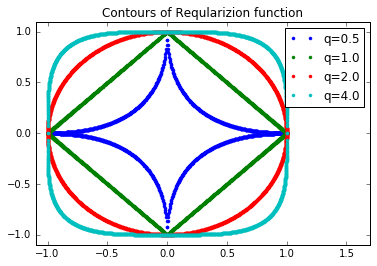

<function __main__.interact_regularizer>

In [2]:
thetas = np.linspace(0,math.pi,10**3)
pts = np.asarray([[math.cos(theta),math.sin(theta)] for theta in thetas])
# q=1/2
def show_regularizer(q=0.5):
    ptsq = np.zeros_like(pts)
    n = math.floor(ptsq.shape[0])
    ys = np.zeros((n,1))
    for ix in range(n):
        x = pts[ix,0]
        y_abs = abs((1 - abs(x)**q)**(1./q))
        ys[ix,0] = y_abs
    xs = np.hstack((pts[:,0],pts[:,0]))
    ys = np.vstack((ys,-ys))
    plt.plot(xs, ys, '.', label='q='+str(q))
    
def interact_regularizer(q=0.5,offset=0.7,show_all=True):
    qs = [0.5,1.,2.,4.] if show_all else [q]
    [show_regularizer(qq) for qq in qs]
    plt.xlim(plt.xlim()[0]-0.1,plt.xlim()[1]+offset)
    plt.ylim(plt.ylim()[0]-0.1,plt.ylim()[1]+0.1)
    plt.legend()
    plt.title('Contours of Reqularizion function')
    plt.show()
    
interact(interact_regularizer,q=(.5,4,.5),offset=(0,1.,.1))


## Lasso

* By setting $q=1$ in the generalized regularizer
* if $\lambda$ is set to a large value, some $w_j$'s become zero
* This leads to a sparse model, thereby making it a "feature selector"

* Regularization allows us to use complex models for small data set without overfitting by reducing the model complexity
* However, we trade the problem of finding right basis functions to that of finding the optimal value for the regularization parameter $\lambda$

# Multiple Outputs

* Let
  * $\mathbf{y}(\mathbf{x},\mathbf{w})$ be K dimensional
  * W be $M \times K$ matrix of parameters
  * $\mathbf{\phi}(\mathbf{x})$ is M dimensional
  * $\mathbf{t}$ is K dimensional

\begin{array}{rlr}
p(\mathbf{t} \mid \mathbf{x}, \mathbf{W}, \beta)
&=
\mathcal{N}
\left(
\mathbf{t} \mid \mathbf{W}^T \mathbf{\phi}(\mathbf{x}),
\beta^{-1} \mathcal{I} 
\right)
\\
\ln p = 0
&=
\frac{NK}{2} \ln\left(\frac{\beta}{2\pi}\right)
-
\frac{\beta}{2}
\sum_{n=1}^{N}
\left\|
\mathbf{t}_n
-
\mathbf{W}^T \mathbf{\phi}(\mathbf{x})
\right\|^2
&
\color{gray}{\text{See: Multivariate Gaussian}}
\\
\mathbf{W}_{ML}
&=
\left(
\Phi^T \Phi
\right)^{-1}
\Phi^T \mathbf{T}
= 
\Phi^{\dagger} \mathbf{T}
\end{array}
* That is, the same $\Phi^{\dagger}$ can be used for all K output target variables

# Experiments

In [36]:
def plot_original(x_min, x_max, data):
    x_sin = np.array(np.linspace(x_min,x_max,100)).reshape(100,1)
    plt.plot(x_sin, 
             np.array([math.sin(1+xx) for xx in x_sin]).reshape(x_sin.shape),
             'k',label='actual',linewidth=9)
    plt.plot(data[:,0], data[:,1],'o',c='b', MarkerSize=10,label='input')
    return x_sin


In [79]:
def inv_svd(A):
    U, s, Vh = sp_la.svd(A)
    s = [1./ss if abs(ss)>1e-10 else 0 for ss in s]
    S = np.diag(s)
    return Vh.T @ S @ U.T

In [80]:
# w = [coeff_const, coeff_deg_1, coeff_deg_2, ...]
def lm_poly_fit(x, y, degree, regularizer=None):
    # compute the transform from x-space to Z-space
    n = x.shape[0]
    X = np.ones((n, degree+1))
    for ix_power in range(1,degree+1):
        X[:,ix_power:ix_power+1] = (x**ix_power).reshape(n,1)
    regularizer = math.e**regularizer if regularizer else 0 
    XtX = X.transpose() @ X + regularizer*np.eye(degree+1)
    XtXi = inv_svd(XtX)
    #w = np.linalg.inv(XtX) @ X.transpose() @ y
    w = XtXi @ X.transpose() @ y
    w = w[:,np.newaxis]
    return w

In [47]:
def show_poly_fit(w, color='r',in_pts=100, x_lims=(0,+6)):
    # compute the transform from x-space to Z-space
    x_min, x_max = x_lims
    x = np.linspace(x_min, x_max, in_pts).reshape(in_pts, 1)
    degree = w.shape[0]-1
    x_aug = np.ones_like(x)
    for ix_degree in range(1,degree+1):
        x_aug = np.hstack([x_aug, np.power(x, ix_degree)])
    y = x_aug @ w # find the hypothesis val
    plt.plot(x, y.reshape(in_pts,1), c=color,linewidth=2,label='degree '+str(degree))
    

In [39]:
# sample points from a sine function with noise
def gen_data(sigma_noise=1e-5,in_pts=20):
    x_min, x_max = 0, +6                            # max x values while sampling
    x = np.random.rand(in_pts, 1)*(x_max-x_min)+x_min     # gen random points
    x = np.sort(x,0)                                # sort them please
    y = np.array([math.sin(1+xx) for xx in x]).reshape(in_pts,1) # find the value of sine
    noise = np.random.normal(0, sigma_noise, (in_pts, 1)) # generate random noise
    data = np.hstack([x, y+noise]) # compose data using [x y+noise]
    return (x_min, x_max, data)

In [61]:
def fit_and_plot_his(data, deg_test, x_vals_plot):
    w_his=np.polynomial.polynomial.polyfit(data[:,0],data[:,1], deg=deg_test)
    w_his = w_his[::-1]
    p2 = np.poly1d(w_his)
    plt.plot(x_vals_plot, p2(x_vals_plot),'y',linewidth=4,label='yo')
    return w_his

In [55]:
def find_norm(w):
    return math.sqrt(np.sum(w**2))

norms w/o reg:  -1  w/ reg:  1.762218075321277  np : 887.6643306367187
diff: w/o reg:  None  w/ reg:  11819264.3888


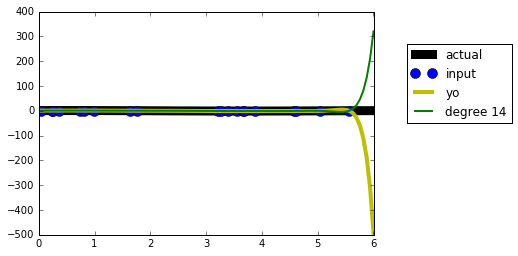

In [82]:
x_min, x_max, data = gen_data(10**-2)
def show_all_fit_poly(deg_test=5, sigma_noise_power=-5, regularizer=-18, show_non_reg=False):
    x_sin = plot_original(x_min, x_max, data)
    w_his = fit_and_plot_his(data, deg_test,x_sin)
    #[show_poly_fit(lm_poly_fit(data[:,0], data[:,1], ref_deg),'r',100) for ref_deg in [1,2,3]]
    diff_my, norm_my = 'None', -1
    if show_non_reg:
        w_my=lm_poly_fit(data[:,0], data[:,1], deg_test)
        show_poly_fit(w_my,'r',100,(x_min, x_max))
        w_my = w_my.ravel()
        diff_my = np.sum((w_my-w_his[::-1])**2)
        norm_my = find_norm(w_my)
        
    w_my_r=lm_poly_fit(data[:,0], data[:,1], deg_test, regularizer)
    show_poly_fit(w_my_r,'g',100, (x_min, x_max))
    print('norms', 'w/o reg: ', norm_my,
          ' w/ reg: ', find_norm(w_my_r), 
          ' np :', find_norm(w_his))
    print('diff:', 'w/o reg: ', diff_my, ' w/ reg: ', np.sum((w_my_r-w_his[::-1])**2))
    plt.legend(loc=(1.1 ,0.5));plt.show()
interactive(show_all_fit_poly, deg_test=(5,25),
            sigma_noise_power=(-10,10), regularizer=(-20,20))

The difference in the fits is coz
* The matrix $\Phib^T \Phib$ can become rank deficient, which screws up the inverse
* We can use SVD to get rid of that.
* np.polynomial.polynomial.polyfit takes care of the problem as follows:
  > If some of the singular values of V are so small that they are neglected 
* Hence, it is better to use SVD for the inverse 

In [43]:
A_test_inv = np.array([[2,0],[0,2]])
print('A\n',A_test_inv)
#print('A**-1\n',A_test_inv**-1)
print('inv(A)\n',np.linalg.inv(A_test_inv))
a=[1,2,3]; a.reverse(); print(a)
bb = np.array([1,2,3,4])
print('bb:\n',bb)
print('bb:\n',bb[::-1])

A
 [[2 0]
 [0 2]]
inv(A)
 [[ 0.5  0. ]
 [ 0.   0.5]]
[3, 2, 1]
bb:
 [1 2 3 4]
bb:
 [4 3 2 1]


In [44]:
np.eye(4)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [77]:
eye_eye = np.eye(4)
eye_eye = eye_eye*3
eye_eye[1,1] = 0
print(eye_eye)
#print(sp_la.inv(eye_eye))
u, s, Vh = sp_la.svd(eye_eye)
s = [1./ss if abs(ss)>1e-10 else 0 for ss in s]
print(np.diag(s))

[[ 3.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  3.  0.]
 [ 0.  0.  0.  3.]]
[[ 0.33333333  0.          0.          0.        ]
 [ 0.          0.33333333  0.          0.        ]
 [ 0.          0.          0.33333333  0.        ]
 [ 0.          0.          0.          0.        ]]
